In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


# **About Dataset**

**The below column reference:**

1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
import os
print(os.listdir('/kaggle/input/online-payments-fraud-detection-dataset'))

['PS_20174392719_1491204439457_log.csv']


In [9]:
df = pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')

In [10]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [11]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


## Checking for any missing values in df

In [13]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


**Checking for duplicates and assess the size of the dataset**

In [14]:
# Check for duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")

# Check the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

Number of duplicates: 0
Shape of the dataset: (6362620, 11)


## Descriptive Statistics
**Getting the summary statistics of numerical features to understand their distributions**

In [15]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


## Visualizing Target Variable Distribution
**Analyzing the distribution of the target variable (isFraud).**

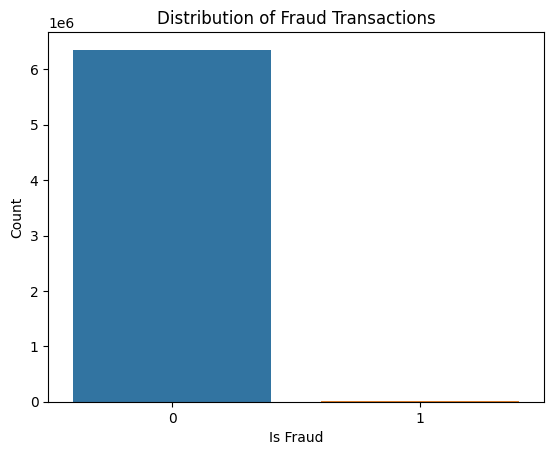

In [16]:
# Plotting the distribution of the target variable
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

## Checkng for Class Imbalance
**Investigating the class balance in your target variable, as imbalanced datasets can affect model performance.**

In [17]:
# Checking for class imbalance
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100
print(f"Percentage of Fraud Transactions:\n{fraud_percentage}")

Percentage of Fraud Transactions:
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


## Analyze Numerical Features
**Examination of the distributions of numerical features and their relationships with the target variable.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


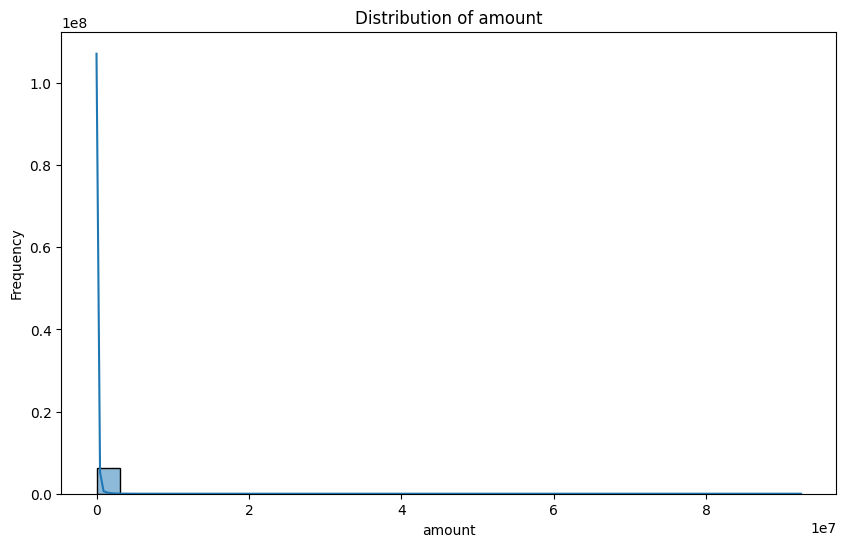

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


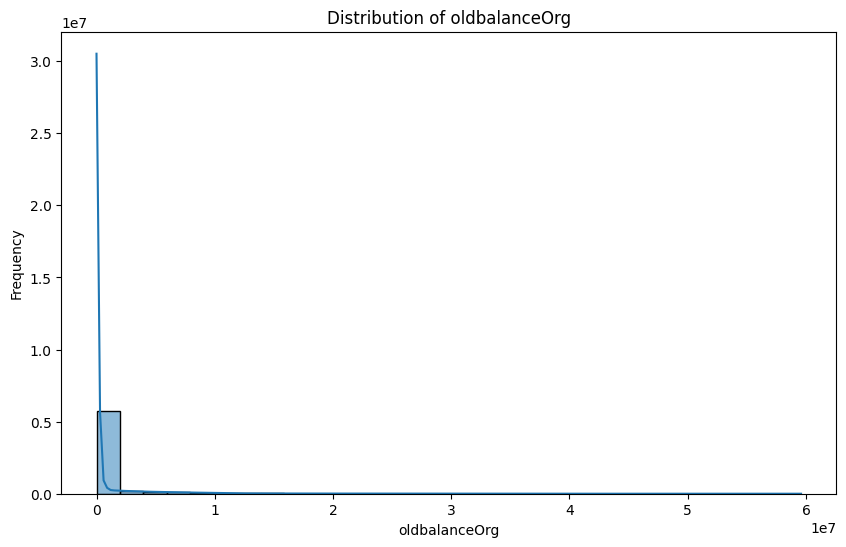

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


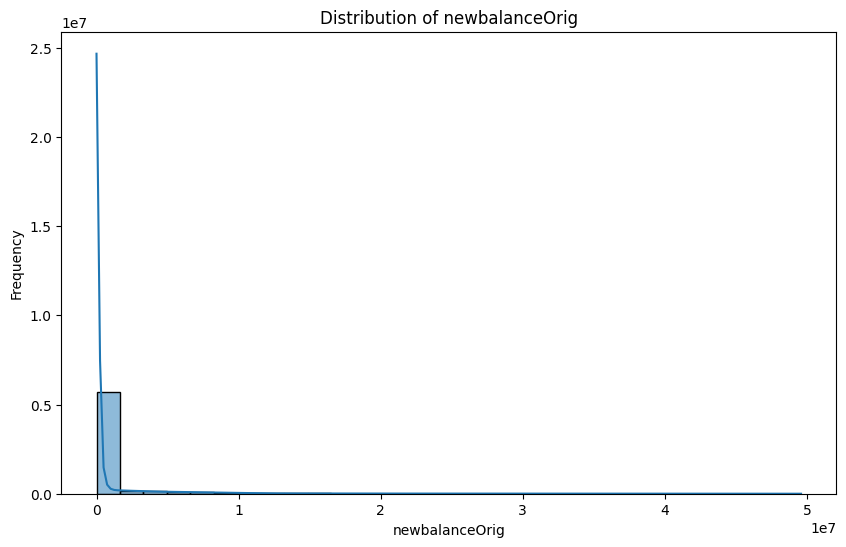

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


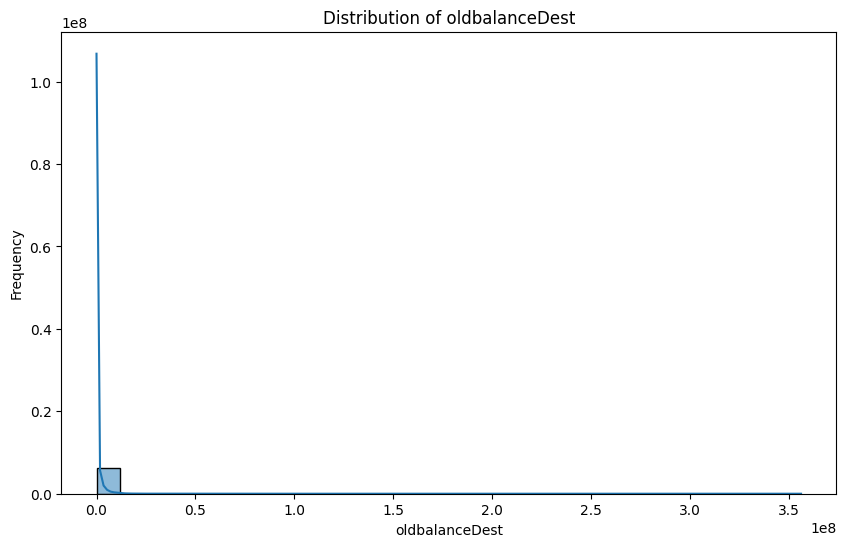

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


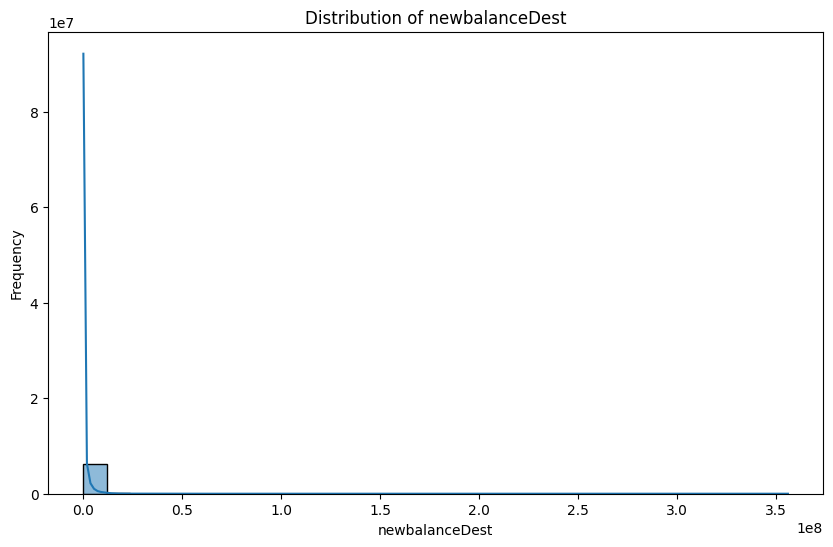

In [18]:
# Plotting distributions of numerical features
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Correlation Matrix
**Analysis of the correlation between numerical features and the target variable to identify potential predictors**

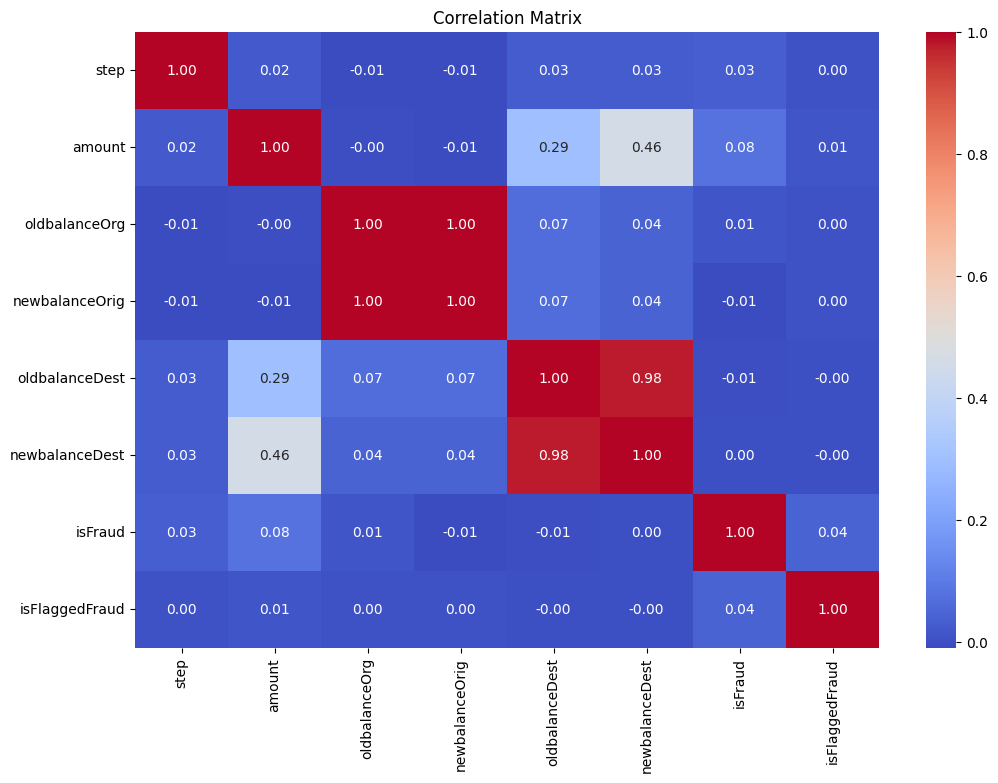

In [19]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Outlier Detection
**Identifying and visualize outliers in numerical features, as they can skew the model performance**

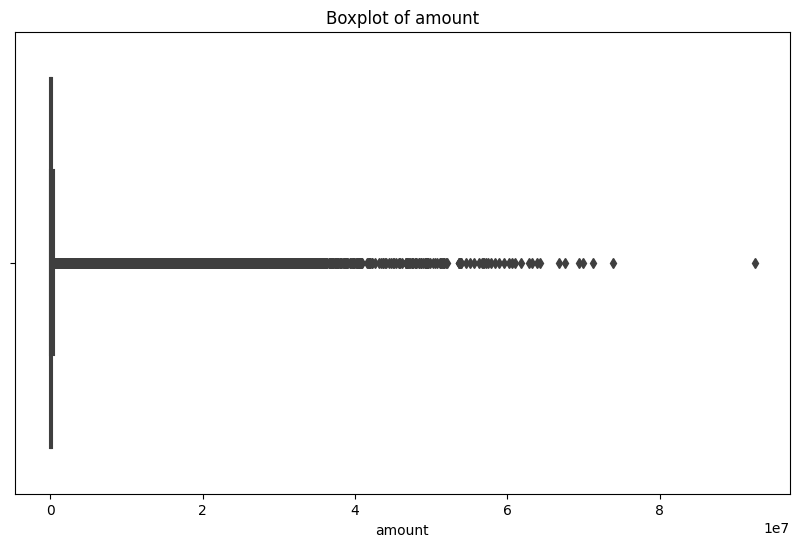

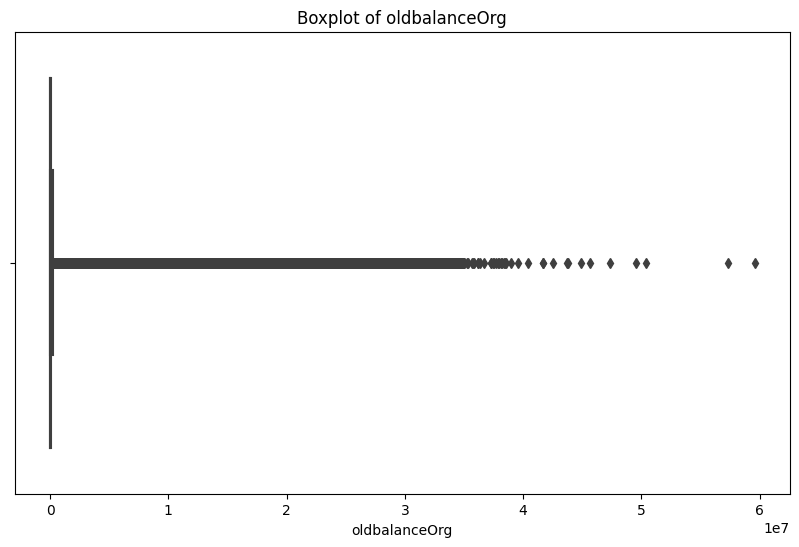

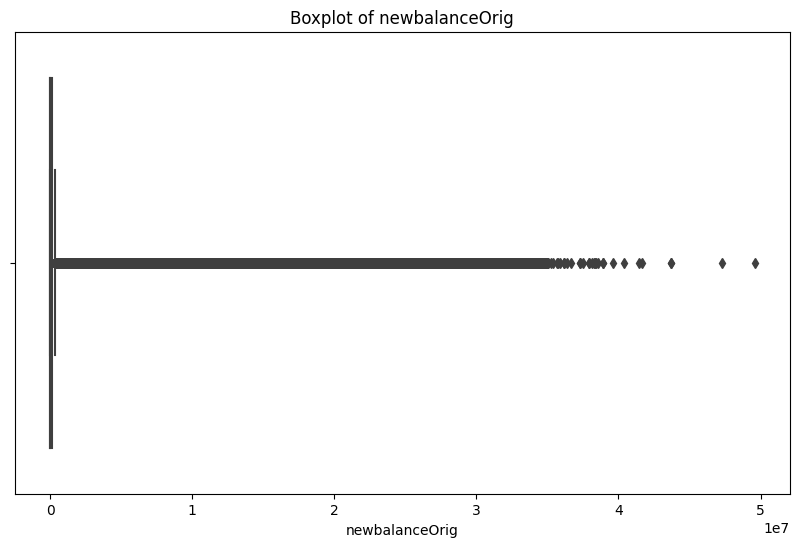

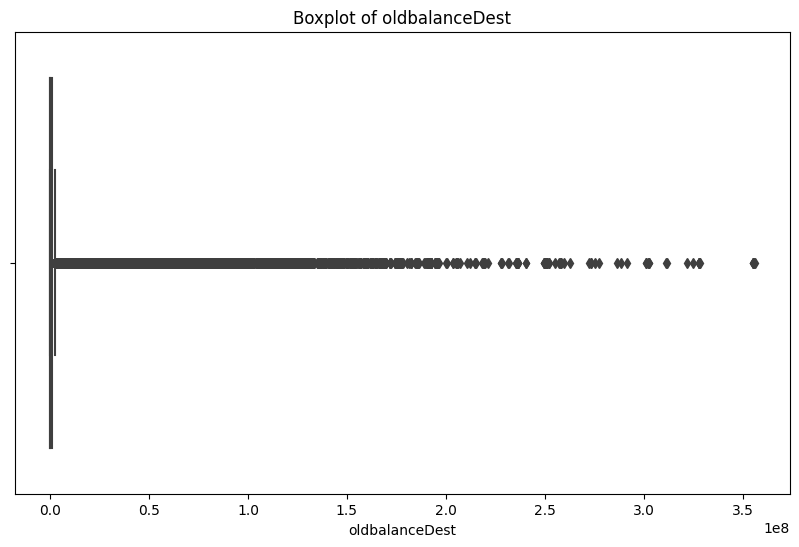

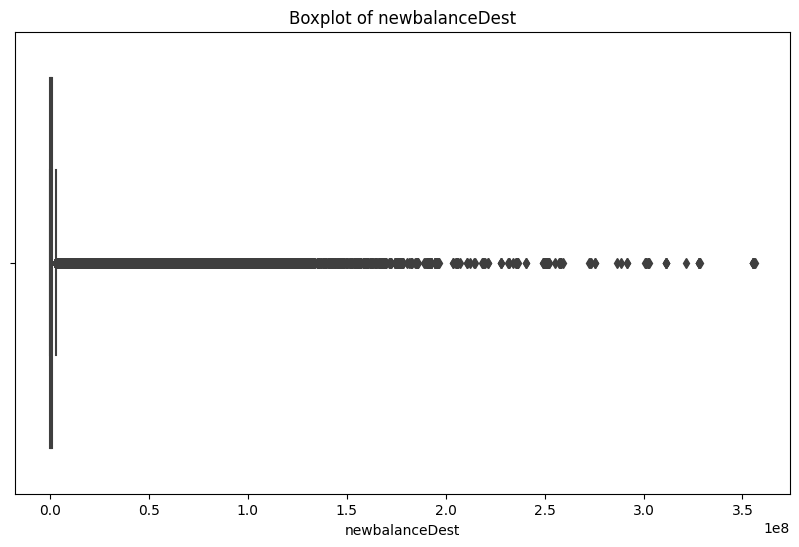

In [20]:
# Boxplots to detect outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

## Dropping Features
The features 'nameOrig' and 'nameDest' represent the identifiers (likely unique IDs) for the origin and destination accounts involved in the transactions. Typically, such identifiers are not helpful for training a machine learning model

In [21]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


## Checking unique classes

In [22]:
unique_classes = df['isFraud'].unique()
print("Unique classes in 'isFraud':", unique_classes)

Unique classes in 'isFraud': [0 1]


In [23]:
unique_classes = df['type'].unique()
print("Unique classes in 'type':", unique_classes)

Unique classes in 'type': ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


# Part 2: Preprocessing and Training the model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report

## Encode categorical features in order to do Sampling

In [25]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder

# 1. Initialize LabelEncoder
label_encoder = LabelEncoder()

# 2. Loop through all object-type columns and apply Label Encoding
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is of object type
        df[column] = label_encoder.fit_transform(df[column])

# Now all categorical columns have been converted into numerical values

## New Features

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class BalanceChangeFeatureAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Ensure X is a pandas DataFrame
        X = X.copy()  # To avoid changes to the original dataset

        # Create the new features
        X['balanceChangeOrig'] = X['newbalanceOrig'] - X['oldbalanceOrg']
        X['balanceChangeDest'] = X['newbalanceDest'] - X['oldbalanceDest']

        # Drop the old balance columns
        X.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

        return X

df = BalanceChangeFeatureAdder().transform(df)

In [27]:
# Move 'isFraud' to the last column
fraud_column = df.pop('isFraud')
df['isFraud'] = fraud_column

# Check the new order of columns
df.head()

,step,type,amount,isFlaggedFraud,balanceChangeOrig,balanceChangeDest,isFraud
0,1,3,9839.64,0,-9839.64,0.0,0
1,1,3,1864.28,0,-1864.28,0.0,0
2,1,4,181.00,0,-181.00,0.0,1
3,1,1,181.00,0,-181.00,-21182.0,1
4,1,3,11668.14,0,-11668.14,0.0,0


## Define features and target variable

In [28]:
# Define X and y
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [29]:
X

,step,type,amount,isFlaggedFraud,balanceChangeOrig,balanceChangeDest
0,1,3,9839.64,0,-9839.64,0.00
1,1,3,1864.28,0,-1864.28,0.00
2,1,4,181.00,0,-181.00,0.00
3,1,1,181.00,0,-181.00,-21182.00
4,1,3,11668.14,0,-11668.14,0.00
...,...,...,...,...,...,...
6362615,743,1,339682.13,0,-339682.13,339682.13
6362616,743,4,6311409.28,0,-6311409.28,0.00
6362617,743,1,6311409.28,0,-6311409.28,6311409.27
6362618,743,4,850002.52,0,-850002.52,0.00


## Identify categorical and numerical features

In [30]:
categorical_features = ['type']
numerical_features = ['step',
 'amount',
 'isFlaggedFraud',
 'balanceChangeOrig',
 'balanceChangeDest']

In [31]:
print(categorical_features)

print(numerical_features)

['type']
['step', 'amount', 'isFlaggedFraud', 'balanceChangeOrig', 'balanceChangeDest']


## Split the dataset

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Apply SMOTETomek separately to the training data only

In [33]:
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

print(X_resampled.dtypes)
print(y_resampled.dtypes)

step                   int64
type                   int64
amount               float64
isFlaggedFraud         int64
balanceChangeOrig    float64
balanceChangeDest    float64
dtype: object
int64


## Defining the preprocessing for numerical and categorical features

In [34]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

## Combining transformers into a single ColumnTransformer

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        #('cat', categorical_transformer, categorical_features)
    ]
)

In [39]:
X_resampled.shape


(10135228, 6)

In [40]:
y_resampled.shape

(10135228,)

In [56]:
X_sample, y_sample = X_resampled[:200000], y_resampled[:200000]  # Use a subset of the data


In [45]:
X_test.shape

(1272524, 6)

In [46]:
y_test.shape

(1272524,)

In [57]:
X_sample_test, y_sample_test = X_test[:40000], y_test[:40000]

## Training Random Forest Classifier

In [58]:
#Define the model
rf_params = {"n_estimators":100, 
             "max_depth":10, 
             "min_samples_split":10, 
             "min_samples_leaf":4, 
             "max_features":'sqrt'
    
}

rf_model = RandomForestClassifier(**rf_params)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Train the pipeline
rf_pipeline.fit(X_sample, y_sample)

# Make predictions
rf_y_pred = rf_pipeline.predict(X_sample_test)

# Evaluate the model
print(classification_report(y_sample_test, rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39945
           1       0.95      0.64      0.76        55

    accuracy                           1.00     40000
   macro avg       0.97      0.82      0.88     40000
weighted avg       1.00      1.00      1.00     40000



In [61]:
rf_report_dict = classification_report(y_sample_test, rf_y_pred, output_dict=True)
rf_report_dict

{'0': {'precision': 0.9994995370717914,
  'recall': 0.9999499311553386,
  'f1-score': 0.9997246833858938,
  'support': 39945},
 '1': {'precision': 0.9459459459459459,
  'recall': 0.6363636363636364,
  'f1-score': 0.7608695652173914,
  'support': 55},
 'accuracy': 0.99945,
 'macro avg': {'precision': 0.9727227415088686,
  'recall': 0.8181567837594874,
  'f1-score': 0.8802971243016426,
  'support': 40000},
 'weighted avg': {'precision': 0.9994259008839934,
  'recall': 0.99945,
  'f1-score': 0.9993962575984122,
  'support': 40000}}

## Training XGBoost Model

In [59]:
xg_params ={
    "n_estimators":100,
    "max_depth":3, 
    "learning_rate":0.1, 
    "subsample":0.8,
    "colsample_bytree":0.8, 
    "gamma":0.1
}

xg_model = XGBClassifier(**xg_params)

xg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xg_model)
])

# Train the pipeline
xg_pipeline.fit(X_sample, y_sample)

# Make predictions
xg_y_pred = xg_pipeline.predict(X_sample_test)

# Evaluate the model
print(classification_report(y_sample_test, xg_y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39945
           1       0.91      0.53      0.67        55

    accuracy                           1.00     40000
   macro avg       0.95      0.76      0.83     40000
weighted avg       1.00      1.00      1.00     40000



In [ ]:
xg_report_dict = classification_report(y_test, xg_y_pred, output_dict=True)
xg_report_dict

## Logistic Regression

In [64]:
lr_params = {
    "solver": "saga",
    "max_iter": 3000,
    "multi_class": "auto",
    "random_state": 8888,
}

lr_model = LogisticRegression(**lr_params)
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lr_model)
])

# Train the pipeline
lr_pipeline.fit(X_sample, y_sample)

# Make predictions
lr_y_pred = lr_pipeline.predict(X_sample_test)

# Evaluate the model
print(classification_report(y_sample_test, lr_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39945
           1       0.96      0.47      0.63        55

    accuracy                           1.00     40000
   macro avg       0.98      0.74      0.82     40000
weighted avg       1.00      1.00      1.00     40000



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [65]:
lr_report_dict = classification_report(y_sample_test, lr_y_pred, output_dict=True)
lr_report_dict

{'0': {'precision': 0.9992745102944488,
  'recall': 0.9999749655776693,
  'f1-score': 0.9996246152306115,
  'support': 39945},
 '1': {'precision': 0.9629629629629629,
  'recall': 0.4727272727272727,
  'f1-score': 0.6341463414634146,
  'support': 55},
 'accuracy': 0.99925,
 'macro avg': {'precision': 0.9811187366287059,
  'recall': 0.736351119152471,
  'f1-score': 0.8168854783470131,
  'support': 40000},
 'weighted avg': {'precision': 0.999224581916868,
  'recall': 0.99925,
  'f1-score': 0.9991220826041818,
  'support': 40000}}

In [67]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 48.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 81.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.0/563.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 4.2.4
    Uninstalling cachetools-4.2.4:
      Successfully uninstalled cachetools-4.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.9.2 w

In [88]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from mlflow.models import ModelSignature, infer_signature

In [99]:
# Set the experiment name
mlflow.set_experiment("First Experiment")


# Sample data with an integer column
X_samples = pd.DataFrame({
    'feature1': [1, 2, 3, 4],
    'feature2': [5, 6, 7, 8],
    'feature3': [9, 10, 11, 12]
})
y_samples = pd.Series([0, 1, 0, 1])

# Introduce a missing value
X_sample_with_nan = X_samples.copy()
X_sample_with_nan.iloc[0, 0] = np.nan  # Simulate a missing value

# Convert all columns to float to avoid issues with NaNs
X_samples = X_samples.astype(float)
X_sample_with_nan = X_sample_with_nan.astype(float)

# Create a Random Forest Pipeline
pipeline = Pipeline([
    ('model', RandomForestClassifier())
])

# Fit the model on the original data (without NaNs)
pipeline.fit(X_samples, y_samples)

# Define the model signature using the sample with NaN values
signature = infer_signature(X_sample_with_nan, pipeline.predict(X_sample_with_nan.fillna(0)))


# Define the conda environment for the model
conda_env = {
    'name': 'my_env',
    'channels': ['defaults'],
    'dependencies': [
        'python=3.12',  # Specify your Python version
        'scikit-learn=1.2.2',  # specific version
        'cloudpickle=3.0.0',  # specific version
        # any other dependencies your model needs can be added
    ]
}

with mlflow.start_run():
    mlflow.log_params(rf_params)
    mlflow.log_metrics({
        'accuracy': rf_report_dict['accuracy'],
        'recall_class_0': rf_report_dict['0']['recall'],
        'recall_class_1': rf_report_dict['1']['recall'],
        'f1_score_macro': rf_report_dict['macro avg']['f1-score']
    })
    
    # Log the model with the specified conda environment and input example
    mlflow.sklearn.log_model(pipeline, "Random Forest", conda_env=conda_env,signature=signature)


In [ ]:
!mlflow ui --port 5000

[2024-10-02 00:50:02 +0000] [1752] [INFO] Starting gunicorn 23.0.0
[2024-10-02 00:50:02 +0000] [1752] [INFO] Listening at: http://127.0.0.1:5000 (1752)
[2024-10-02 00:50:02 +0000] [1752] [INFO] Using worker: sync
[2024-10-02 00:50:02 +0000] [1753] [INFO] Booting worker with pid: 1753
[2024-10-02 00:50:02 +0000] [1754] [INFO] Booting worker with pid: 1754
[2024-10-02 00:50:02 +0000] [1755] [INFO] Booting worker with pid: 1755
[2024-10-02 00:50:02 +0000] [1756] [INFO] Booting worker with pid: 1756
